# Constantes

In [99]:
RAW_DATASET_PATH = 'dataset/artists.csv'
IMAGES_PATH = 'dataset/images/images'
RESIZED_PATH = 'dataset/resized'

# Resize de imagem

In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Found 8683 files belonging to 1 classes.
Using 6947 files for training.
Using 1736 files for validation.


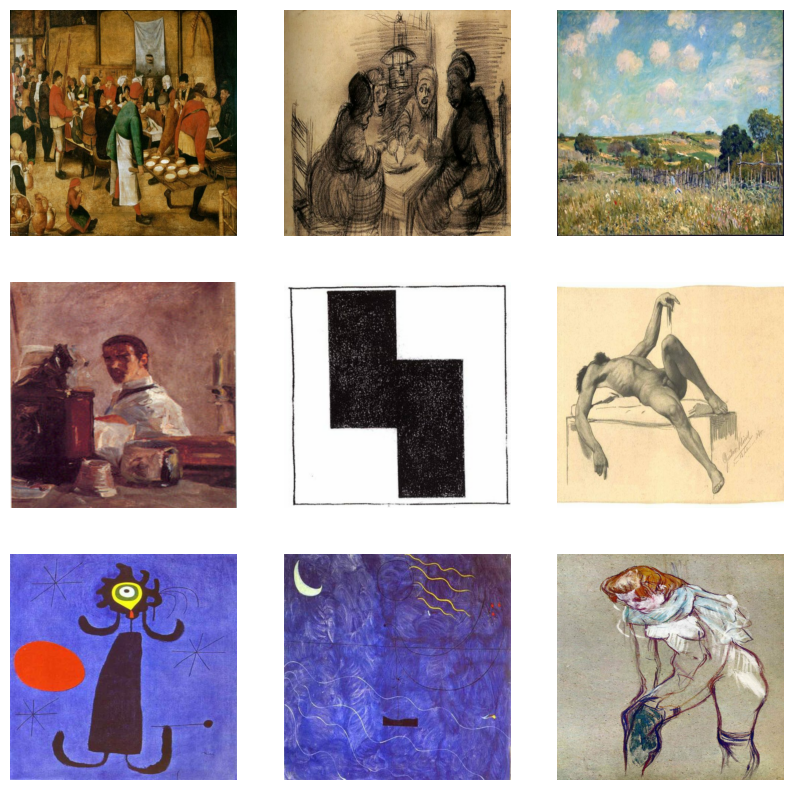

In [55]:
######## TESTE QUE A ANITA FEZ ########
#carregar o dataset
(training, validation) = tf.keras.preprocessing.image_dataset_from_directory("dataset/resized", 
label_mode=None, image_size=(512, 512), validation_split=0.2, subset="both", seed=123)


#normalizar o dataset
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

#mostrar o dataset
plt.figure(figsize=(10, 10))
for images in training.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

#dividir o dataset em treino e teste


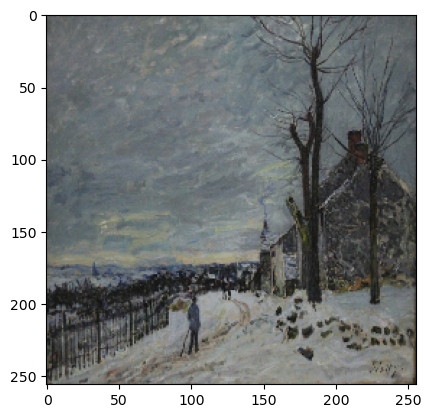

In [56]:
# Load image "dataset\images\images\Alfred_Sisley\Alfred_Sisley_1.jpg"
image = tf.io.read_file("dataset\images\images\Alfred_Sisley\Alfred_Sisley_1.jpg")
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [256, 256])

# Show image
plt.imshow(image)
plt.show()

In [57]:
def read_and_resize_img(img_path):
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [512, 512])
    return image

# Analisando e pré-processando base de dados

In [73]:
df_artists = pd.read_csv("dataset/artists.csv")
df_artists

id                       name        years  \
0    0          Amedeo Modigliani  1884 - 1920   
1    1         Vasiliy Kandinskiy  1866 - 1944   
2    2               Diego Rivera  1886 - 1957   
3    3               Claude Monet  1840 - 1926   
4    4              Rene Magritte  1898 - 1967   
5    5              Salvador Dali  1904 - 1989   
6    6              Edouard Manet  1832 - 1883   
7    7              Andrei Rublev  1360 - 1430   
8    8           Vincent van Gogh  1853 – 1890   
9    9               Gustav Klimt  1862 - 1918   
10  10           Hieronymus Bosch  1450 - 1516   
11  11           Kazimir Malevich  1879 - 1935   
12  12             Mikhail Vrubel  1856 - 1910   
13  13              Pablo Picasso  1881 - 1973   
14  14          Peter Paul Rubens  1577 - 1640   
15  15      Pierre-Auguste Renoir  1841 - 1919   
16  16             Francisco Goya  1746 - 1828   
17  17                Frida Kahlo  1907 - 1954   
18  18                   El Greco  1541 - 1614   
19  19             Albrecht Dürer  1471 - 1528   
20  20              Alfred Sisley  1839 - 1899   
21  21             Pieter Bruegel  1525 - 1569   
22  22               Marc Chagall  1887 - 1985   
23  23          Giotto di Bondone  1266 - 1337   
24  24          Sandro Botticelli  1445 - 1510   
25  25                 Caravaggio  1571 - 1610   
26  26          Leonardo da Vinci  1452 - 1519   
27  27            Diego Velazquez  1599 - 1660   
28  28              Henri Matisse  1869 - 1954   
29  29               Jan van Eyck  1395 - 1441   
30  30                Edgar Degas  1834 - 1917   
31  31                  Rembrandt  1606 - 1669   
32  32                     Titian  1488 - 1576   
33  33  Henri de Toulouse-Lautrec  1864 – 1901   
34  34            Gustave Courbet  1819 - 1877   
35  35           Camille Pissarro  1830 - 1903   
36  36             William Turner  1775 - 1851   
37  37               Edvard Munch  1863 - 1944   
38  38               Paul Cezanne  1839 – 1906   
39  39           Eugene Delacroix  1798 – 1863   
40  40             Henri Rousseau  1844 – 1910   
41  41             Georges Seurat  1859 – 1891   
42  42                  Paul Klee  1879 – 1940   
43  43              Piet Mondrian  1872 – 1944   
44  44                  Joan Miro  1893 – 1983   
45  45                Andy Warhol  1928 – 1987   
46  46               Paul Gauguin  1848 – 1903   
47  47                    Raphael  1483 – 1520   
48  48               Michelangelo  1475 – 1564   
49  49            Jackson Pollock  1912 – 1956   

                                      genre               nationality  \
0                             Expressionism                   Italian   
1              Expressionism,Abstractionism                   Russian   
2                   Social Realism,Muralism                   Mexican   
3                             Impressionism                    French   
4                  Surrealism,Impressionism                   Belgian   
5                                Surrealism                   Spanish   
6                     Realism,Impressionism                    French   
7                             Byzantine Art                   Russian   
8                        Post-Impressionism                     Dutch   
9                     Symbolism,Art Nouveau                  Austrian   
10                     Northern Renaissance                     Dutch   
11                              Suprematism                   Russian   
12                                Symbolism                   Russian   
13                                   Cubism                   Spanish   
14                                  Baroque                   Flemish   
15                            Impressionism                    French   
16                              Romanticism                   Spanish   
17                   Primitivism,Surrealism                   Mexican   
18                                Mannerism             Spanish,Gr

In [59]:
# Create a list of all genres
possible_genres = set()

for genres in df_artists['genre']:
    for genre in genres.split(','):
        possible_genres.add(genre)
print(possible_genres)
print(f'São {len(possible_genres)} classes possíveis')

{'Pop Art', 'Surrealism', 'Northern Renaissance', 'Impressionism', 'Post-Impressionism', 'Muralism', 'High Renaissance', 'Expressionism', 'Neoplasticism', 'Symbolism', 'Art Nouveau', 'Proto Renaissance', 'Suprematism', 'Realism', 'Abstractionism', 'Cubism', 'Early Renaissance', 'Baroque', 'Byzantine Art', 'Social Realism', 'Primitivism', 'Abstract Expressionism', 'Romanticism', 'Mannerism'}
São 24 classes possíveis


In [60]:
#Cria o cabeçalho do dataframe
#df_arts = pd.DataFrame(columns=['artist id', 'image path', *possible_genres])
#df_arts.dtypes

In [61]:
#Cria o dataframe com as imagens e as classes
for i, artist in df_artists.iterrows():
    arts_number = artist['paintings']
    current_genres = artist['genre'].split(',')
    artist_name = artist['name'].replace(' ', '_')
    art_artist_dict = {}

    art_artist_dict['artist id'] = np.repeat(artist['id'], arts_number)
    art_artist_dict['image path'] = np.array([f'{IMAGES_PATH}/{artist_name}/{artist_name}_{art_num}.jpg' for art_num in range(1, arts_number + 1)])
    for genre in possible_genres:
        if genre in current_genres:
            art_artist_dict[genre] = np.ones((arts_number), dtype=np.int8)
        else:
            art_artist_dict[genre] = np.zeros((arts_number), dtype=np.int8)
    df_art_artist = pd.DataFrame(art_artist_dict)
    if i == 0:
        df_arts = df_art_artist
    else:
        df_arts = pd.concat([df_arts, df_art_artist], ignore_index=True)
df_arts


artist id                                         image path  Pop Art  \
0             0  dataset/images/images/Amedeo_Modigliani/Amedeo...        0   
1             0  dataset/images/images/Amedeo_Modigliani/Amedeo...        0   
2             0  dataset/images/images/Amedeo_Modigliani/Amedeo...        0   
3             0  dataset/images/images/Amedeo_Modigliani/Amedeo...        0   
4             0  dataset/images/images/Amedeo_Modigliani/Amedeo...        0   
...         ...                                                ...      ...   
8441         49  dataset/images/images/Jackson_Pollock/Jackson_...        0   
8442         49  dataset/images/images/Jackson_Pollock/Jackson_...        0   
8443         49  dataset/images/images/Jackson_Pollock/Jackson_...        0   
8444         49  dataset/images/images/Jackson_Pollock/Jackson_...        0   
8445         49  dataset/images/images/Jackson_Pollock/Jackson_...        0   

      Surrealism  Northern Renaissance  Impressionism  Post-Impressionism  \
0              0                     0              0                   0   
1              0                     0              0                   0   
2              0                     0              0                   0   
3              0                     0              0                   0   
4              0                     0              0                   0   
...          ...                   ...            ...                 ...   
8441           0                     0              0                   0   
8442           0                     0              0                   0   
8443           0                     0              0                   0   
8444           0                     0              0                   0   
8445           0                     0              0                   0   

      Muralism  High Renaissance  Expressionism  ...  Abstractionism  Cubism  \
0            0                 0              1  ...               0       0   
1            0                 0              1  ...               0       0   
2            0                 0              1  ...               0       0   
3            0                 0              1  ...               0       0   
4            0                 0              1  ...               0       0   
...        ...               ...            ...  ...             ...     ...   
8441         0                 0              0  ...               0       0   
8442         0                 0              0  ...               0       0   
8443         0                 0              0  ...               0       0   
8444         0                 0              0  ...               0       0   
8445         0                 0              0  ...               0       0   

      Early Renaissance  Baroque  Byzantine Art  Social Realism  Primitivism  \
0                     0        0              0               0            0   
1                     0        0              0               0            0   
2                     0        0              0               0            0   
3                     0        0              0               0            0   
4                     0        0              0               0            0   
...                 ...      ...            ...             ...          ...   
8441                  0        0              0               0            0   
8442                  0        0              0               0            0   
8443                  0        0              0               0            0   
8444                  0        0              0               0            0   
8445                  0        0              0               0            0   

      Abstract Expressionism  Romanticism  Mannerism  
0                          0            0          0  
1                          0            0          0  
2                          0            0    

In [92]:
def plotar_imgs_artist(df_arts, artist_id):
    artist = df_arts[df_arts['artist id'] == artist_id]
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))

    axs[0, 0].set_title('Primeira imagem')
    axs[0, 0].imshow(read_and_resize_img(artist['image path'].iloc[0]))

    axs[0, 1].set_title('Segunda imagem')
    axs[0, 1].imshow(read_and_resize_img(artist['image path'].iloc[1]))

    axs[1, 0].set_title('Última imagem')
    axs[1, 0].imshow(read_and_resize_img(artist['image path'].iloc[-1]))

    axs[1, 1].set_title('Penúltima imagem')
    axs[1, 1].imshow(read_and_resize_img(artist['image path'].iloc[-2]))

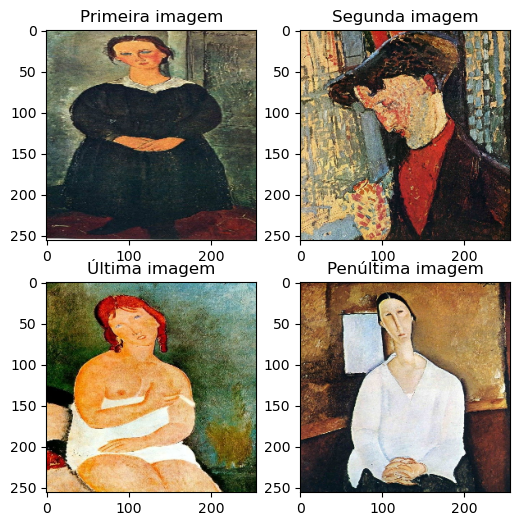

In [93]:
plotar_imgs_artist(df_arts, 0)

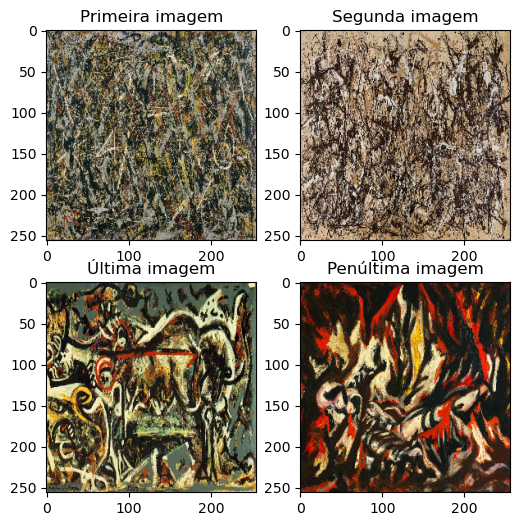

In [94]:
plotar_imgs_artist(df_arts, 49)

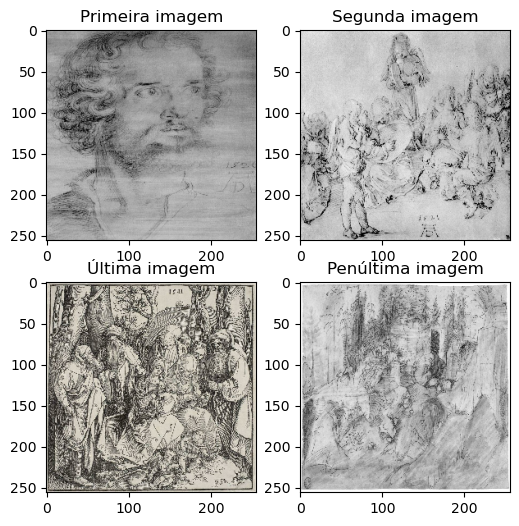

In [95]:
plotar_imgs_artist(df_arts, 19)

In [66]:
# Executar o código a seguir caso tenha ocorrido um problema de enconding ao
# baixar o dataset

import os
import shutil

erro1 = 'Albrecht_DuÔòá├¬rer'
erro2 = 'Albrecht_Du╠êrer'

correto = df_artists.iloc[19]['name'].replace(' ', '_')


if os.path.exists(f'dataset/images/images/{erro1}'):
    shutil.rmtree(f'dataset/images/images/{erro1}')

if os.path.exists(f'dataset/images/images/{erro2}'):
    os.rename(
        f'dataset/images/images/{erro2}', 
        f'dataset/images/images/{correto}'
    )

    for i, file in enumerate(os.listdir(f'dataset/images/images/{correto}')):
        os.rename(
            f'dataset/images/images/{correto}/{file}', 
            f'dataset/images/images/{correto}/{correto}_{i+1}.jpg'
        )

Found 8683 files belonging to 1 classes.
Using 6947 files for training.
Using 1736 files for validation.
<BatchDataset element_spec=TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None)>


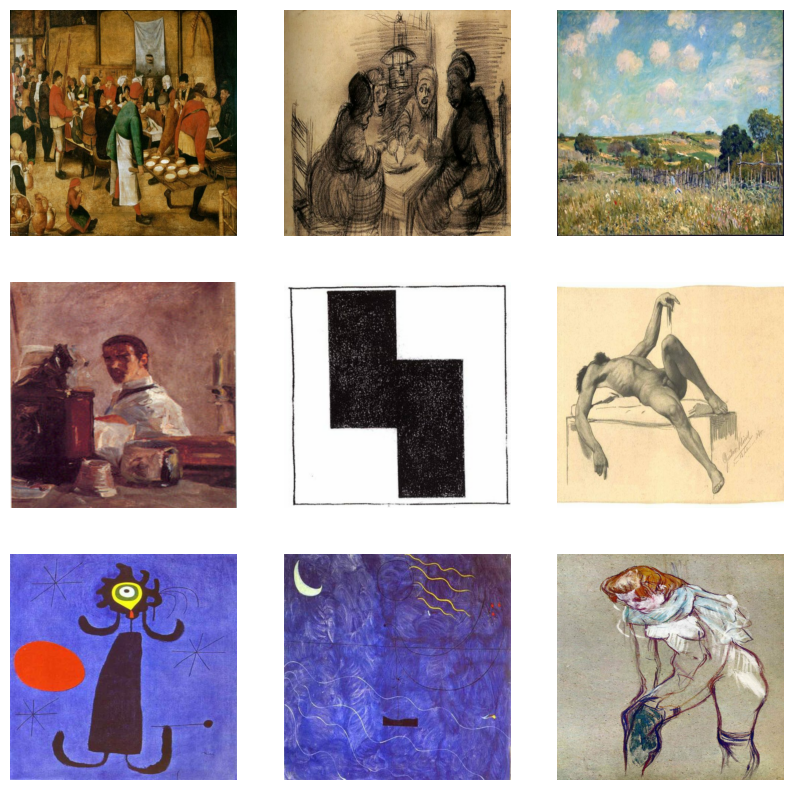

In [77]:
######## TESTE QUE A ANITA FEZ ########
#carregar o dataset
(training, validation) = tf.keras.preprocessing.image_dataset_from_directory("dataset/resized", 
label_mode=None, image_size=(512, 512), validation_split=0.2, subset="both", seed=123)
print(training)


#normalizar o dataset
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

#mostrar o dataset
plt.figure(figsize=(10, 10))
for images in training.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

#dividir o dataset em treino e teste

In [102]:
if not os.path.exists('dataset/resized'):
    os.mkdir('dataset/resized')

for i, art in df_arts.iterrows():
    img_path = art['image path']
    img_name = img_path.split('/')[-1]
    artist_name = img_path.split('/')[-2]

    image = read_and_resize_img(img_path)
    if not os.path.exists(f'{RESIZED_PATH}/{artist_name}'):
        os.mkdir(f'{RESIZED_PATH}/{artist_name}')
    tf.keras.utils.save_img(f'{RESIZED_PATH}/{artist_name}/{img_name}', image)